In [1]:
import pandas as pd
import matplotlib.pyplot as mltp
import nltk
import sklearn as sk
import seaborn as sea
import re 
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()


In [2]:
def stripping(liste):
    return [i.strip() for i in liste]

In [3]:
df=pd.read_csv('data/train_500.csv',converters={'sent_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize_without_stopwords': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'word_tokenize_without_stopwords_port': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'msg_lemmatized': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
})

df['word_tokenize']=df['word_tokenize'].progress_apply(stripping)
df['sent_tokenize']=df['sent_tokenize'].progress_apply(stripping)
df['word_tokenize_without_stopwords']=df['word_tokenize_without_stopwords'].progress_apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].progress_apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].progress_apply(stripping)

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.reset_index(drop=True)

In [5]:
df.columns

Index(['id', 'date', 'text', 'lang', 'language_2', 'word_tokenize',
       'sent_tokenize', 'count_word', 'count_sent',
       'word_tokenize_num_of_stopwords', 'word_tokenize_without_stopwords',
       'word_tokenize_without_stopwords_port', 'msg_lemmatized', 'cleanLinks',
       'laenge_saetze', 'word_per_sent_mean', 'gender', 'age', 'topic',
       'sign'],
      dtype='object')

In [6]:
print(f'Rows in the df: {len(df.index)}')

Rows in the df: 19500


In [55]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word)
        
         for word in text if word ]
    return lemm_text
df['msg_lemmatized']=df['word_tokenize_without_stopwords'].apply(lambda x:lemmatizer(x))

- lgrams 
- ngrams 
- sehen wie oft wörter vorkommen 
- sehen welche tokens überall vorkommen in mehreren oder nur in einem drin sind 
- sehen welche dokumente zugeordnet ist und wie  die verteilung ist der uhrsprünglichen topics 
- tendenzen herrausfinden 
- labeling nicht so gut oder topic modelling 
- zu viel topics oder stopwords 
- frequenzen finden -_> idf --> weiviele wörter in den dokumenten vorkommen 
- statistiken der wörter --> basierend auf ngrams 
- edge case nicht beschneiden --> schwellwerte --> explorativ 
- 

In [56]:
df.head()

,id,date,text,lang,language_2,word_tokenize,sent_tokenize,count_word,count_sent,word_tokenize_num_of_stopwords,word_tokenize_without_stopwords,word_tokenize_without_stopwords_port,msg_lemmatized,cleanLinks,laenge_saetze,word_per_sent_mean,gender,age,topic,sign
0,2970791,"25,May,2004",This blog is being posted due to the fact that...,en,en,"[This, blog, is, being, posted, due, to, the, ...",[This blog is being posted due to the fact tha...,83,4,34,"[This, blog, posted, due, fact, little, develo...","[thi, blog, post, due, fact, littl, develop, h...","[This, blog, posted, due, fact, little, develo...",This blog is being posted due to the fact that...,4,20.75,male,14,Student,Sagittarius
1,3931851,"02,agosto,2004",So I have a big fucking interview tomorrow for...,en,en,"[So, I, have, a, big, fucking, interview, tomo...",[So I have a big fucking interview tomorrow fo...,88,5,31,"[So, I, big, fucking, interview, tomorrow, new...","[so, i, big, fuck, interview, tomorrow, new, s...","[So, I, big, fucking, interview, tomorrow, new...",So I have a big fucking interview tomorrow for...,5,17.60,male,15,Student,Pisces
2,3481650,"07,July,2004",I was reminded just now of the time Ashley and...,en,en,"[I, was, reminded, just, now, of, the, time, A...",[I was reminded just now of the time Ashley an...,574,32,234,"[I, reminded, time, Ashley, I, drove, Kemah, w...","[i, remind, time, ashley, i, drove, kemah, win...","[I, reminded, time, Ashley, I, drove, Kemah, w...",I was reminded just now of the time Ashley and...,32,17.94,female,17,Student,Gemini
3,4187211,"20,August,2004",I was checking up on my cousin Dylan and Fanni...,en,en,"[I, was, checking, up, on, my, cousin, Dylan, ...","[""I was checking up on my cousin Dylan and Fan...",84,3,32,"[I, checking, cousin, Dylan, Fannie, ""s"", wedd...","[i, check, cousin, dylan, fanni, ""s"", wed, sit...","[I, checking, cousin, Dylan, Fannie, ""s"", wedd...",I was checking up on my cousin Dylan and Fanni...,3,28.00,female,23,Student,Taurus
4,3686696,"24,June,2004",for the NME interview click urlLink part 1 and...,en,en,"[for, the, NME, interview, click, urlLink, par...",[for the NME interview click urlLink part 1 an...,12,1,3,"[NME, interview, click, urlLink, part, 1, urlL...","[nme, interview, click, urllink, part, 1, urll...","[NME, interview, click, urlLink, part, 1, urlL...",for the NME interview click urlLink part 1 and...,1,12.00,female,23,Student,Aquarius


In [22]:
from wordcloud import WordCloud

In [53]:
element=[',','.','!','"',')','(']

x = [word  for word in  df['msg_lemmatized'][0] if word not in element]
x

['thi',
 'blog',
 'post',
 'due',
 'fact',
 'littl',
 'develop',
 'happen',
 'recent',
 'regard',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'if',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individu',
 'must',
 'somehow',
 'organ',
 'someth',
 'soon',
 'also',
 'consid',
 'last',
 'day',
 'school',
 'i',
 'think',
 'everyon',
 'particip',
 'success',
 'we',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school']

In [57]:
def point_red(liste):
    element=[',','.','!','"',')','(']
    return [word  for word in  df['msg_lemmatized'][0] if word not in element]
df['msg_lemmatized_without_point']=df['msg_lemmatized'].apply(lambda x:point_red(x))


In [58]:
text = list(df.msg_lemmatized_without_point.values)
flat_list = [item for sublist in text for item in sublist]
flat_list

['This',
 'blog',
 'posted',
 'due',
 'fact',
 'little',
 'development',
 'happened',
 'recently',
 'regarding',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'If',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individual',
 'must',
 'somehow',
 'organize',
 'something',
 'soon',
 'Also',
 'consider',
 'last',
 'day',
 'school',
 'I',
 'think',
 'everyone',
 'participates',
 'success',
 'We',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school',
 'This',
 'blog',
 'posted',
 'due',
 'fact',
 'little',
 'development',
 'happened',
 'recently',
 'regarding',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'If',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individual',
 'must',
 'somehow',
 'organize',
 'something',
 'soon',
 'Also',
 'consider',
 'last',
 'day',
 'school',
 'I',
 'think',
 'everyone',
 'participates',
 'success',
 'We',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school',
 'This',
 'blog'

In [59]:
long_string = ','.join(flat_list)

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be re

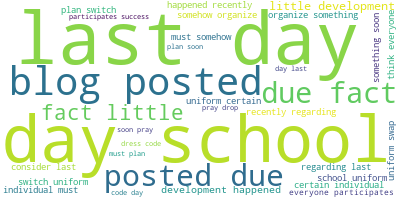

In [60]:
text = list(df.msg_lemmatized.values)
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [46]:
df['msg_lemmatized'].map(lambda x: re.sub('[,\.!?]', '', x))

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
/var/folders/k3/z_svrdgd6sb9lc9bqdfzp_k00000gn/T/ipykernel_99781/510959301.py:1: DeprecationWarning: invalid escape sequence \.
  df['msg_lemmatized'].map(lambda x: re.sub('[,\.!?]', '', x))
/var/folders/k3/z_svrdgd6sb9lc9bqdfzp_k00000gn/T/ipykernel_99781/510959301.py:1: DeprecationWarning: invalid escape sequence \.
  df['msg_lemmatized'].map(lambda x: re.sub('[,\.!?]', '', x))


TypeError: expected string or bytes-like object

In [15]:
topics=df['topic'].unique().tolist()

In [73]:
liste=[]
for topic in  topics:

    text = list(df[df['topic']==topic].msg_lemmatized_without_point.values)
    flat_list = [item for sublist in text for item in sublist]
    liste.append(flat_list)
liste

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school',
  'This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soo

In [29]:
import gensim.corpora as corpora

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [72]:
df['msg_lemmatized_without_point'].values.tolist()

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school'],
 ['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'so

In [74]:
data_words=liste

In [75]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 500), (1, 500), (2, 500), (3, 500), (4, 500), (5, 500), (6, 500), (7, 500), (8, 1500), (9, 500), (10, 500), (11, 500), (12, 500), (13, 500), (14, 500), (15, 500), (16, 1500), (17, 500), (18, 1000), (19, 500), (20, 500), (21, 1000), (22, 500), (23, 500), (24, 500), (25, 500), (26, 1500), (27, 500), (28, 500), (29, 1000)]


In [76]:
import gensim
from gensim.utils import simple_preprocess

In [77]:
from pprint import pprint
# number of topics
num_topics = 38
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(15,
  '0.079*"school" + 0.061*"last" + 0.057*"day" + 0.052*"uniform" + '
  '0.042*"plan" + 0.041*"must" + 0.038*"soon" + 0.030*"posted" + '
  '0.028*"recently" + 0.027*"participates"'),
 (27,
  '0.078*"school" + 0.066*"day" + 0.062*"last" + 0.047*"soon" + 0.036*"must" + '
  '0.035*"uniform" + 0.034*"plan" + 0.029*"posted" + 0.028*"pray" + '
  '0.028*"drop-the-dress-code-day"'),
 (13,
  '0.075*"school" + 0.073*"day" + 0.071*"last" + 0.049*"plan" + 0.042*"soon" + '
  '0.039*"must" + 0.038*"uniform" + 0.026*"success" + 0.026*"blog" + '
  '0.025*"I"'),
 (28,
  '0.067*"day" + 0.060*"last" + 0.056*"school" + 0.054*"soon" + 0.047*"plan" + '
  '0.041*"must" + 0.038*"uniform" + 0.028*"development" + 0.027*"happened" + '
  '0.027*"pray"'),
 (8,
  '0.072*"last" + 0.070*"day" + 0.062*"school" + 0.049*"plan" + 0.045*"must" + '
  '0.044*"uniform" + 0.032*"soon" + 0.031*"This" + 0.029*"certain" + '
  '0.028*"If"'),
 (3,
  '0.071*"school" + 0.055*"last" + 0.055*"day" + 0.053*"soon" + 0.044*"plan" + 

In [78]:
import pyLDAvis

In [79]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
25     0.001474 -0.000806       1        1  3.134938
13     0.000701  0.001228       2        1  2.971692
6      0.001729  0.000295       3        1  2.946892
23    -0.000047 -0.001037       4        1  2.927961
34     0.000628 -0.000161       5        1  2.922969
21    -0.002286  0.000049       6        1  2.857802
22    -0.000296 -0.003485       7        1  2.836688
0      0.000193 -0.003558       8        1  2.831135
1      0.000472  0.001503       9        1  2.828600
30    -0.000826 -0.002779      10        1  2.815592
16    -0.003474 -0.000689      11        1  2.811145
31     0.002646  0.000104      12        1  2.765699
32     0.001016 -0.003817      13        1  2.758578
2      0.000890  0.002351      14        1  2.720436
3      0.000090  0.001542      15        1  2.697605
15     0.001173  0.000167      16        1  2.692111
12    -0.000888  0.001170      17        1  2.656554
4      0.003704 -0.000179      18        1  2.654760
11     0.002281  0.000145      19        1  2.654264
18    -0.002864 -0.000313      20        1  2.648446
8     -0.001271 -0.000014      21        1  2.631862
20     0.000205  0.001465      22        1  2.629683
24     0.003006 -0.001189      23        1  2.614182
5     -0.002603  0.001751      24        1  2.610420
26    -0.002524 -0.000562      25        1  2.596613
29    -0.000199 -0.000492      26        1  2.561348
10     0.002885 -0.001092      27        1  2.556301
27    -0.000278  0.004403      28        1  2.538240
33    -0.001742 -0.001353      29        1  2.513986
36     0.000175  0.001668      30        1  2.495760
28    -0.001000  0.000310      31        1  2.466103
19    -0.000401 -0.000700      32        1  2.428119
7     -0.002408 -0.002439      33        1  2.426613
9      0.006609  0.001129      34        1  2.418356
14     0.000459  0.000529      35        1  2.248218
37    -0.002054  0.004432      36        1  2.210378
35    -0.003342 -0.000156      37        1  2.132153
17    -0.001834  0.000578      38        1  1.787799, topic_info=       Term          Freq         Total Category  logprob  loglift
8       day  56941.000000  56941.000000  Default  30.0000  30.0000
3      This  20494.000000  20494.000000  Default  29.0000  29.0000
21     plan  39221.000000  39221.000000  Default  28.0000  28.0000
26   school  56788.000000  56788.000000  Default  27.0000  27.0000
34  uniform  39054.000000  39054.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
34  uniform    613.324202  39054.720689  Topic38  -3.2418  -0.1296
23     pray    311.895417  20067.423697  Topic38  -3.9180  -0.1400
8       day    846.636980  56941.110552  Topic38  -2.9194  -0.1843
26   school    813.989112  56788.248726  Topic38  -2.9587  -0.2210
16     last    795.012198  56461.883023  Topic38  -2.9823  -0.2388

[1210 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.031836     Also
0         2  0.025160     Also
0         3  0.028847     Also
0         4  0.024811     Also
0         5  0.025160     Also
...     ...       ...      ...
34       34  0.020484  uniform
34       35  0.026706  uniform
34       36  0.015594  uniform
34       37  0.019281  uniform
34       38  0.015696  uniform

[1330 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[26, 14, 7, 24, 35, 22, 23, 1, 2, 31, 17, 32, 33, 3, 4, 16, 13, 5, 12, 19, 9, 21, 25, 6, 27, 30, 11, 28, 34, 37, 29, 20, 8, 10, 15, 38, 36, 18])